# Demo and test of RIDE environments

In [1]:
import ipywidgets
env_map={'ride-v0':'0.4.2',
        'arora-v0':'2.10.15'}
env_dd = ipywidgets.Dropdown(
       options=list(env_map.keys()),
       value=list(env_map.keys())[0],
       description='Environment:')
ver = ipywidgets.Text(
       value=list(env_map.values())[0],
       description='Version:', )
# Updates the image options based on directory value
def update_ver(*args):
    ver.value = env_map.get(env_dd.value)
    
# Tie the image options to directory value
env_dd.observe(update_ver, 'value')
box = ipywidgets.HBox([env_dd,ver])
box

In [2]:
%reload_ext autoreload
%autoreload 2
env_id = env_dd.value

if env_id=="ride-v0":
#from navsim_envs import ride as navenv
    from navsim_envs.ride import default_env_config
    from navsim_envs.ride import RideUnityEnv as UnityEnv
    from navsim_envs.ride import RideGymEnv as GymEnv
    env_path = f"/data/work/unity-envs/RIDE_{ver.value}/RIDE"
elif env_id=="arora-v0":
    from navsim_envs.arora import default_env_config
    from navsim_envs.arora import AroraUnityEnv as UnityEnv
    from navsim_envs.arora import AroraGymEnv as GymEnv
    env_path = f"/data/work/unity-envs/ARORA_{ver.value}/ARORA"
import gym
import matplotlib.pyplot as plt
from ezai.env import env_info
import numpy as np
import copy
import yaml

navsim_envs: using cv2 as image library
navsim_envs: Adding arora-v0 to Gym registry
navsim_envs: Adding ride-v0 to Gym registry


In [3]:
env_config = default_env_config.copy()
env_config["env_path"]=env_path
env_config["seed"]=123
env_config["timeout"]=600
print(env_id,':',env_path)

arora-v0 : /data/work/unity-envs/ARORA_2.10.15/ARORA


In [4]:
print(yaml.dump(env_config))

agent_car_physics: 0
area: 0
base_port: 5004
debug: false
env_gpu_id: 0
env_path: /data/work/unity-envs/ARORA_2.10.15/ARORA
episode_max_steps: 1000
goal: 0
goal_clearance: 2.5
goal_distance: 50
log_folder: ./env_log
obs_height: 64
obs_mode: 0
obs_width: 64
relative_steering: true
reward_collision_mul: 4
reward_for_goal: 50
reward_for_no_viable_path: -50
reward_spl_delta_mul: 1
reward_step_mul: 0.1
save_actions: true
save_vector_obs: true
save_visual_obs: true
seed: 123
segmentation_mode: 1
show_visual: false
start_from_episode: 1
task: 0
timeout: 600
traffic_vehicles: 0
worker_id: 0



# The UnityEnv

In [11]:
env_config["env_path"]=None
env_config["obs_mode"]=1

In [12]:
uenv = UnityEnv(env_config)

[INFO] Listening on port 5004. Start training by pressing the Play button in the Unity Editor.
[INFO] Connected to Unity environment with package version 2.3.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment Editor at port 5004 to start from episode 1


In [13]:
uenv.reset()

[INFO] Connected new brain: VectorNavigator?team=0


In [14]:
print(uenv.unity_max_x,uenv.unity_max_z)

3284.0 2666.3


In [15]:
print(uenv.navmap_max_x,uenv.navmap_max_y)

3284 2666


In [16]:
uenv.close()

# The GymEnv

In [ ]:
# look at all observation modes
for i in UnityEnv.observation_modes:
    env_config["obs_mode"]=i
    env = gym.make(env_id, env_config=env_config) # ride.RideGymEnv(env_config)
    print('Observation Mode {}'.format(env_config["obs_mode"]))
    env_info(env)
    env.close()
    del env

[INFO] Listening on port 5004. Start training by pressing the Play button in the Unity Editor.
[INFO] Connected to Unity environment with package version 2.3.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment Editor at port 5004 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0
Forward:


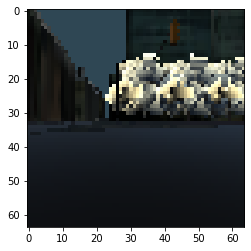

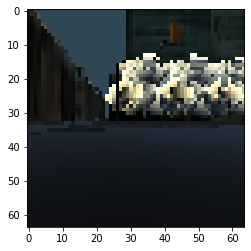

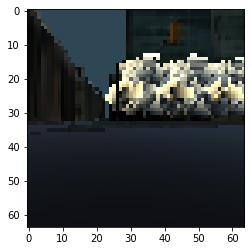

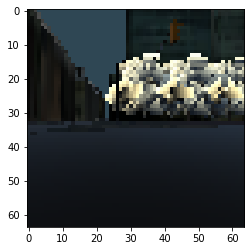

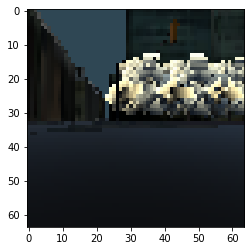

Backward:


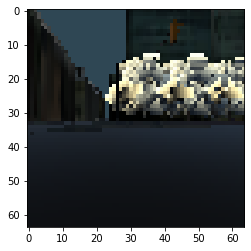

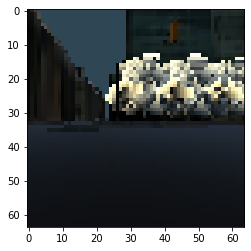

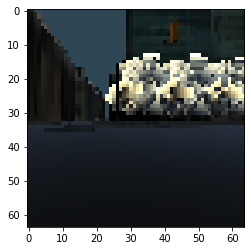

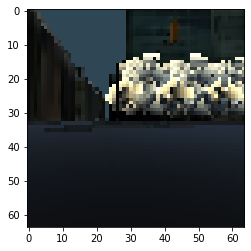

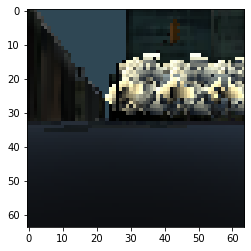

In [17]:
# test for 5 steps forward and 5 steps back 
env_config["obs_mode"]=1
env = gym.make(env_id, env_config=env_config)

steps = 5
obs = env.reset()
#print(obs)
print("Forward:")
for i in range(steps):
    obs = env.step(UnityEnv.actions['forward'])
    #print(obs[-1])
    plt.imshow(env.render(mode='rgb_array'))
    plt.show()
print("Backward:")
for i in range(steps):
    obs = env.step(UnityEnv.actions['backward'])
    #print(obs[-1])
    plt.imshow(env.render(mode='rgb_array'))
    plt.show()
env.close()
del env

# Pending bugs

In [ ]:
# open uenv, run genv, then close uenv 